## 데이터 정보

- 캐글(심장병 클리브랜드 UCI) : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

- age : 나이
- sex : 성별(1 = 남성, 0 = 여성)
- cp : 흉통 유형
- -- 0 : 전형적인 협심증(typical angina) 전형적 가슴 통증
- -- 1 : 비정형 협심증(atypical angina) 비전형적 가슴 통증 
- -- 2 : 비협심증 통증(non-angina pain) 비심인성 가슴통증 
- -- 3: 무증상 (asymptomatic)

- chest pain(흉통)의 임상적 분류 
- 1) typical angina : 다음 3가지 기준을 모두 만족하는경우 
- (가)늑골하 흉부 불편감으로 특징적인 성격과 지속 시간, (나)운동, 감정적 스트레스에 의해 유발, (다) 휴식이나 NTG에 의해 완화
- 2) atypical angina : 위의 3가지 중 2가지 기준을 만족하는 경우
- 3) nonanginal chest pain : 위의 3가지중 하나의 기준만 만족하거나 하나도 만족하지 않은 경우 

- trestbps : 휴식 중 혈압(입원 시 mmHg 단위)
- chol: 혈청 콜레스테롤(mg/dl) (serum cholestoral)
- fbs: (공복 중 혈당 > 120 mg/dl) (1 = 참, 0 = 거짓)
- restecg: 휴식 심전도 결과
- -- 값 0: 정상
- -- 값 1: ST-T파 이상(T파 반전 및/또는 > 0.05mV의 ST 상승 또는 저하)
- -- 값 2: 가능성이 있거나 확실한 좌심실 비대를 나타냄 Estes의 기준으로
- thalach: 도달한 최대 심박수
- exang: 운동 유발 협심증(1 = 예, 0 = 아니오)
- oldpeak = 휴식에 비해 운동으로 유발된 ST 저하
- 기울기: 피크 운동 ST 세그먼트의 기울기
- -- 값 0: 오르막
- -- 값 1: 평평함
- -- 값 2: 내리막
- ca: 플로로소피로 착색된 주요 혈관(0-3)의 수
- thal: 0 = 정상; 1 = 고정 결함; 2 = 가역적 결함 및 라벨
- 조건: 0 = 질병 없음, 1 = 질병 

## 라이브러리 불러오기

In [59]:
import numpy as np
import pandas as pd

#xgboost 알고리즘 사용
from xgboost import XGBClassifier, plot_importance

#훈련,테스트 모델 나누기 위해 사용 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#시각화
import seaborn as sns
import matplotlib.pyplot as plt

#의사 결정 트리 시각화
%matplotlib inline
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

#피처 중요도
from xgboost import plot_importance



In [60]:
#XAI shap기법 사용
import shap

## 데이터 로드 

In [61]:
#심장 질환 data로드
datasets = pd.read_csv("C:/users/ted33/heartdata.csv")

## 데이터 분석 

In [62]:
#데이터세트 크기 확인
datasets.shape

(297, 14)

### 297개의 행과 14개의 열 

In [63]:
#데이터세트 타입 확인
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [64]:
#데이터세트 기본 정보 확인
datasets.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [65]:
#데이터세트 상위 5개 데이터 내용 확인
datasets.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [66]:
#데이터세트 결측치 유무 확인
datasets.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

#### 데이터에 결측치가 없습니다.

In [67]:
# 데이터 중복 행 확인 
datasets.duplicated().sum()

0

#### 데이터에 중복 행이 없습니다.

## 데이터 탐색
- 목표 : 모델의 예측에 기여도가 높은 상위 특징 3개
- 가설 : 특성 중 심장질환

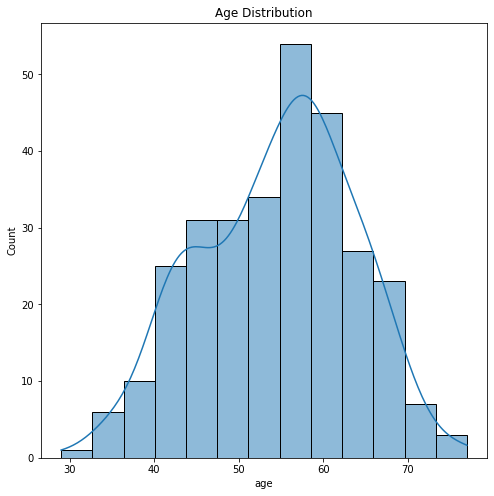

In [68]:
# 나이 분포 확인
plt.figure(figsize=(8,8))
plt.title("Age Distribution")
sns.histplot(data=datasets, x='age', kde=True)
plt.show()

추론 : 대부분의 사람들은 50세에서 60세 사이에 분포합니다.

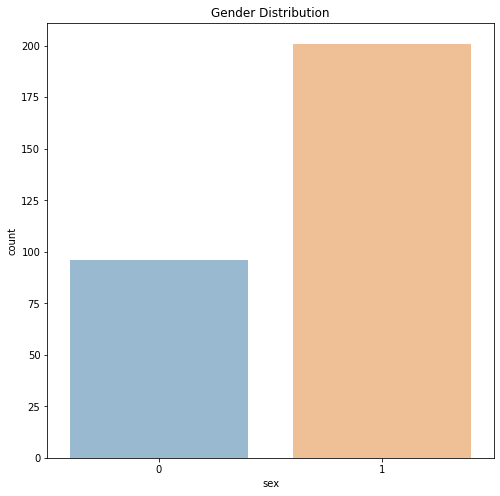

In [69]:
# 성별 분포 확인
plt.figure(figsize=(8,8))
plt.title("Gender Distribution")
sns.countplot(data=datasets, x='sex', alpha=0.5)
plt.show()

여성(0)보다 남성(1)이 더 많습니다.

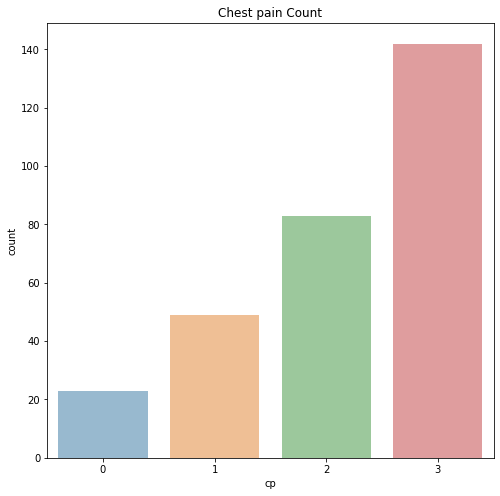

In [70]:
# 가슴 통증 유형 확인 (0:전형적인 협심증, 1: 비정형 협심증, 2: 비협심증 통증, 3: 무증상)
plt.figure(figsize=(8,8))
plt.title("Chest pain Count")
sns.countplot(data=datasets, x='cp', alpha=0.5)
plt.show()

가슴 통증 유형이 0에서 3으로 갈 수록 증가한다
0 : 전형적인 협심증
1 : 비정형 협심증
2 : 비협심증 통증 
3 : 무증상

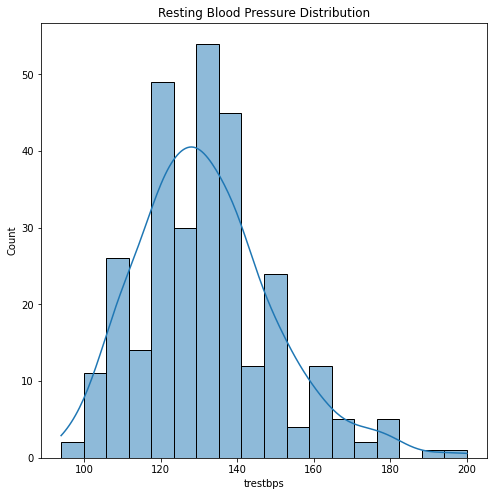

In [71]:
# 휴식 중 혈압 분포 
plt.figure(figsize=(8,8))
plt.title("Resting Blood Pressure Distribution")
sns.histplot(data=datasets, x='trestbps', kde=True)
plt.show()

휴식 중 혈압 분포는 120-140 사이에 주로 분포해있다.
고혈압 : 혈압이 140mmhg 이상, 이완기 혈압 90mmHg이상
정상치 : 120 > 혈압 > 80

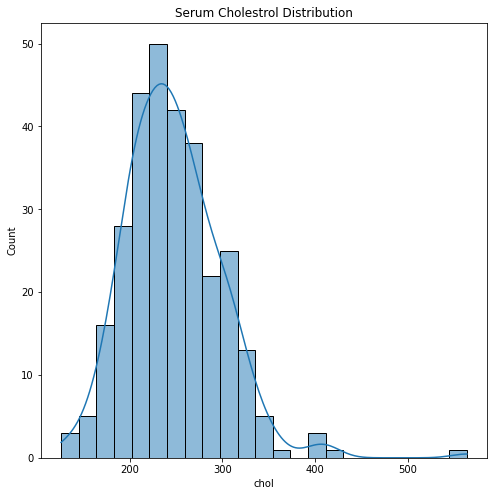

In [72]:
# 혈중 콜레스테롤 분포
plt.figure(figsize=(8,8))
plt.title("Serum Cholestrol Distribution")
sns.histplot(data=datasets, x='chol', kde=True)
plt.show()

혈 중 콜레스테롤은 200-300 사이에 주로 분포해있다.

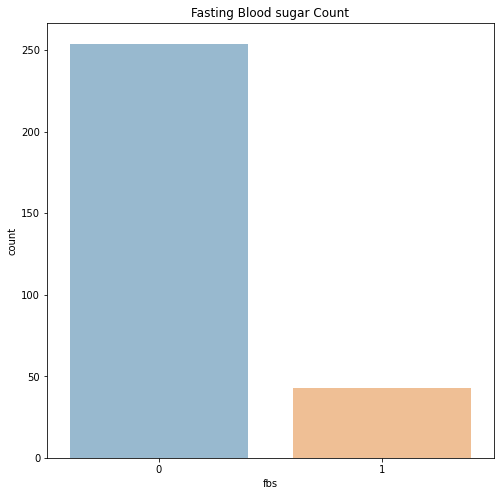

In [73]:
# 공복 혈당 수치 > 120 : 참(1), 수치 < 120 : 거짓(0)
plt.figure(figsize=(8,8))
plt.title("Fasting Blood sugar Count")
sns.countplot(data=datasets, x='fbs', alpha=0.5)
plt.show()

공복 혈당은 대부분의 사람들이 120mg/dl 미만이다.

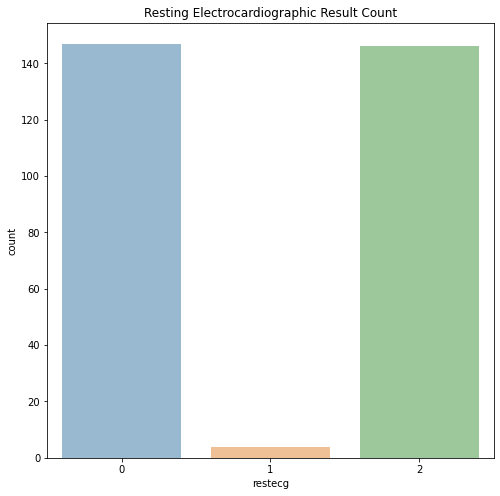

In [74]:
# 휴식 중 심전도 결과
plt.figure(figsize=(8,8))
plt.title("Resting Electrocardiographic Result Count")
sns.countplot(data=datasets, x='restecg', alpha=0.5)
plt.show()

0=정상, 1=ST-T파 비정상(ST상승 또는 하강), 2= 가능성이 있거나 명확한 좌심실 비대)
0과2의 경우는 비슷하지만, 1의경우는 현저히 낮다.

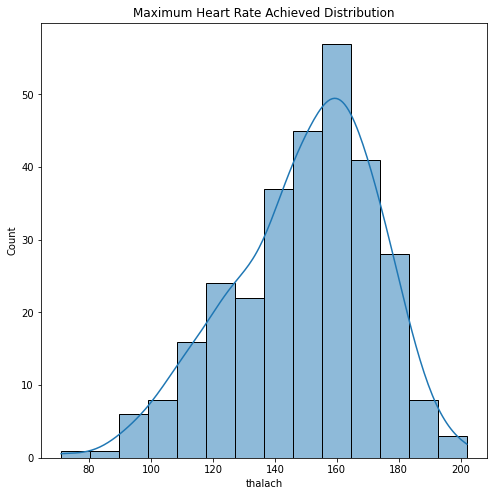

In [75]:
# 최대 심박수
plt.figure(figsize=(8,8))
plt.title("Maximum Heart Rate Achieved Distribution")
sns.histplot(data=datasets, x='thalach', kde=True)
plt.show()

최대 심박수를 도달한 인원이 가장 많은 수치는 160이다.
50명이 넘게 최대심박수에 도달하였다.

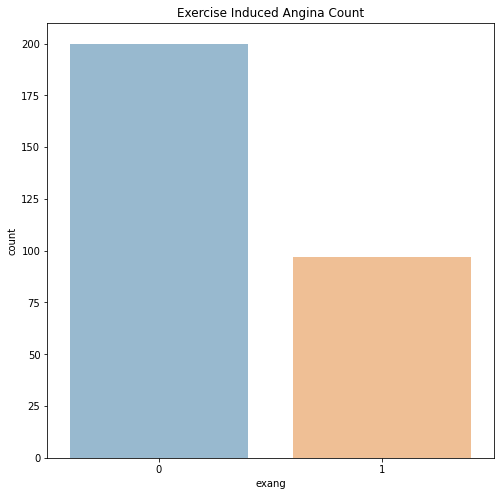

In [76]:
# 운동으로인한 협심증의 수 
plt.figure(figsize=(8,8))
plt.title("Exercise Induced Angina Count")
sns.countplot(data=datasets, x='exang', alpha=0.5)
plt.show()

과반수 이상 운동으로인한 협심증이 발생한 사람은 거의 없다.

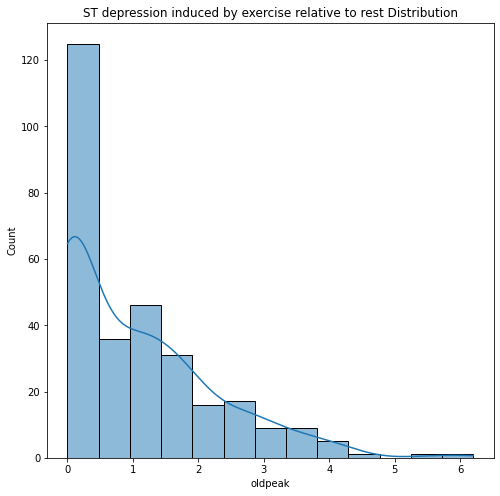

In [77]:
#휴식과 관련된 운동에 의해 유발된 ST 우울증의 분포
plt.figure(figsize=(8,8))
plt.title("ST depression induced by exercise relative to rest Distribution")
sns.histplot(data=datasets, x='oldpeak', kde=True)
plt.show()

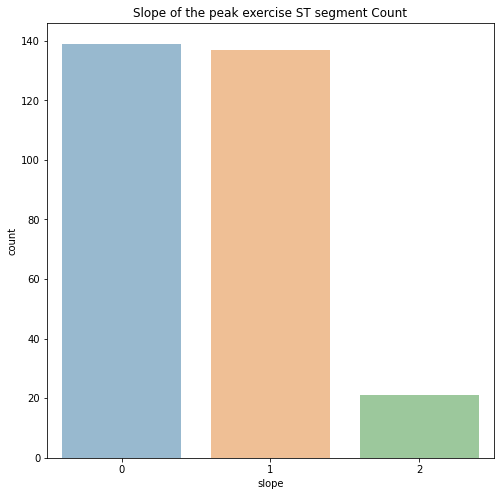

In [78]:
# 피크 운동 ST 세그먼트의 기울기 카운트
plt.figure(figsize=(8,8))
plt.title("Slope of the peak exercise ST segment Count")
sns.countplot(data=datasets, x='slope', alpha=0.5)
plt.show()

0 = 상향, 1 = 평평함, 2 = 내리막 

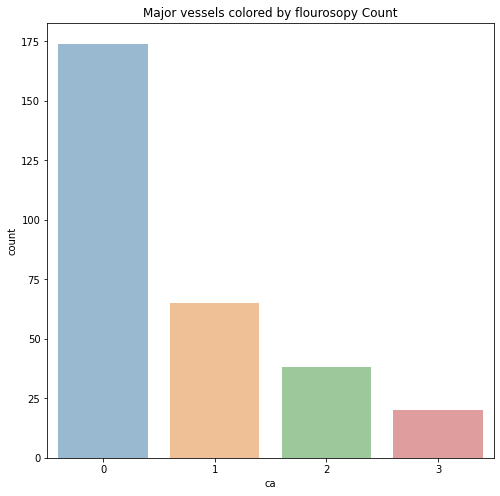

In [79]:
# 플로로소피로 착색된 주요 혈관(0-3)의 수
plt.figure(figsize=(8,8))
plt.title("Major vessels colored by flourosopy Count")
sns.countplot(data=datasets, x='ca', alpha=0.5)
plt.show()

심장은 크게 3개의 심장혈관(관상동맥)에 의해 산소와 영양분을 받고 활동하는데
위 그래프를 보았을때 착색되지않은 환자가 많다.

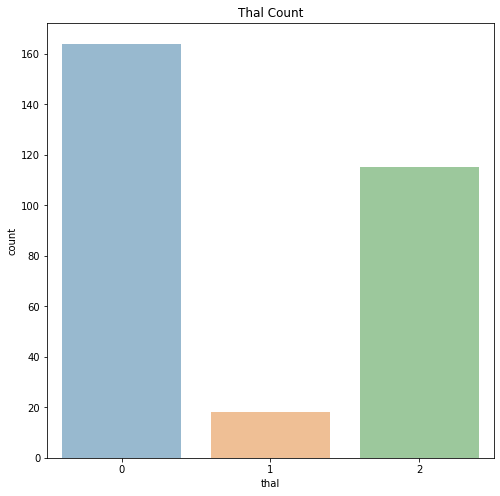

In [80]:
# count of thal
plt.figure(figsize=(8,8))
plt.title("Thal Count")
sns.countplot(data=datasets, x='thal', alpha=0.5)
plt.show()

결함의 수 - 0 = 정상; 1 = 고정된 결함; 2 = 가역적 결함 및 라벨

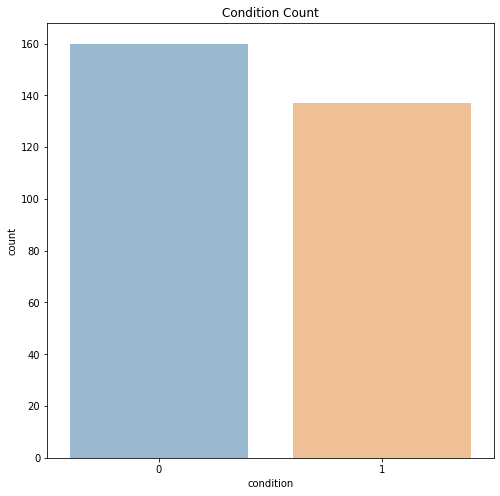

In [81]:
# 질환
plt.figure(figsize=(8,8))
plt.title("Condition Count")
sns.countplot(data=datasets, x='condition', alpha=0.5)
plt.show()

심장병이 있는 사람과 심장병이 없는사람의 분포가 거의 동일하다.(크게차이나지않는다)

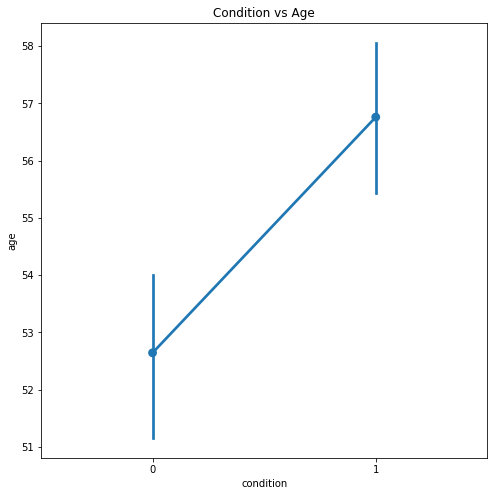

In [82]:
# 나이와 심장병의 관계
plt.figure(figsize=(8,8))
plt.title("Condition vs Age")
sns.pointplot(data=datasets, x='condition', y='age')
plt.show()

추론 : 나이가 높을수록 심장병에 걸릴 위험이 더 높은 경향이 있다.

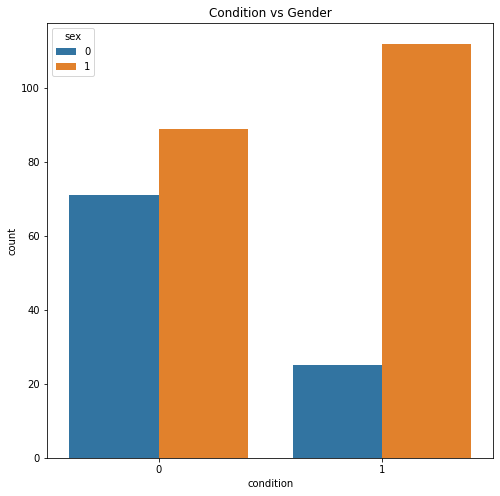

In [83]:
# 성별과 심장병의 관계
plt.figure(figsize=(8,8))
plt.title("Condition vs Gender")
sns.countplot(data=datasets, x='condition', hue='sex')
plt.show()

남성(1)이 여성(0)보다 위험이 더 높은 것으로 보인다.

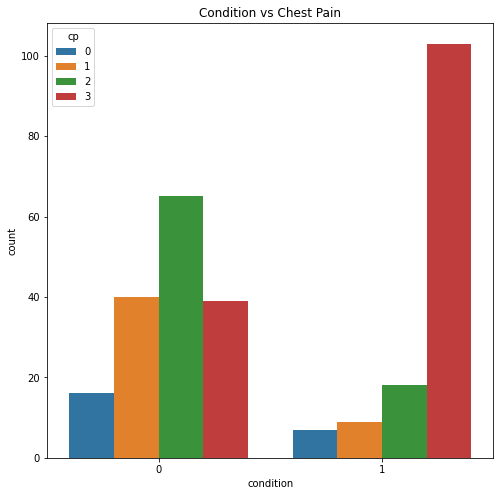

In [84]:
# 가슴통증유형과 심장병의 관계
plt.figure(figsize=(8,8))
plt.title("Condition vs Chest Pain")
sns.countplot(data=datasets, x='condition', hue='cp')
plt.show()

추론 : 흉통이 있는 사람은 심장 질환의 위험이 더 높습니다. 

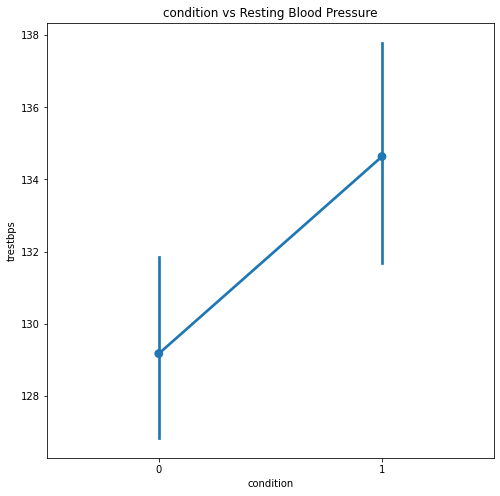

In [85]:
# 심장병 vs 휴식 중 혈압
plt.figure(figsize=(8,8))
plt.title("condition vs Resting Blood Pressure")
sns.pointplot(data=datasets, x='condition', y='trestbps')
plt.show()

추론 : 휴식 중 혈압이 높을 수록 심장병에 걸리는 경향이 있다.

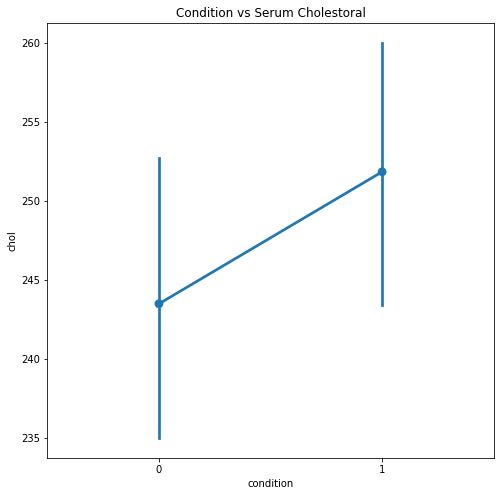

In [86]:
# 질병 vs 혈중 콜레스테롤
plt.figure(figsize=(8,8))
plt.title("Condition vs Serum Cholestoral")
sns.pointplot(data=datasets, x='condition', y='chol')
plt.show()

추론 : 혈중 콜레스테롤이 높을 수록 심장병의 위험에 처하는 경우가 많다.

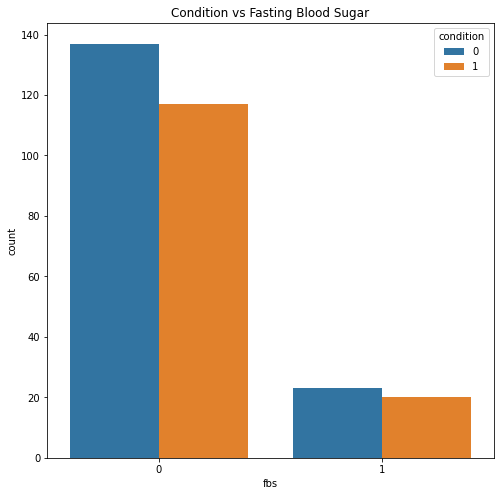

In [87]:
# 심장병  vs 공복 중 혈당
plt.figure(figsize=(8,8))
plt.title("Condition vs Fasting Blood Sugar")
sns.countplot(data=datasets, x='fbs', hue='condition')
plt.show()

fbs > 120 = 1 
fbs < 120 = 0
추론 : fbs(공복중혈당)이 120mg/dl 미만인 사람이 심장병에 걸릴 위험이 더 크다.

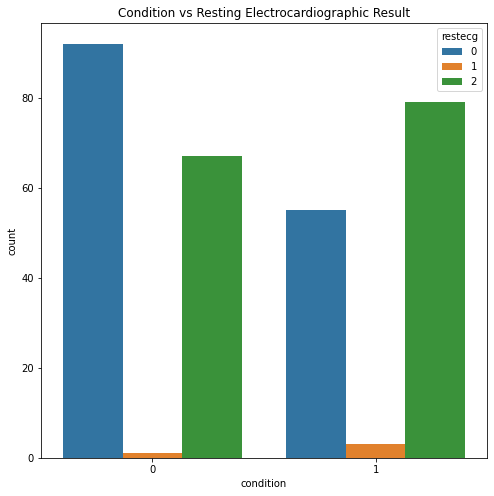

In [88]:
# 심장병 vs 휴식 중 심전도 결과 
plt.figure(figsize=(8,8))
plt.title("Condition vs Resting Electrocardiographic Result")
sns.countplot(data=datasets, x='condition', hue='restecg')
plt.show()

휴식 중 심전도 결과(restecg) 0=정상, 1=ST-T파 비정상, 2=가능성이있거나 좌심실 비대
추론 : 휴식 중 심전도 결과가 2인 사람이 심장병의 위험에 걸리는 경향이 있다.

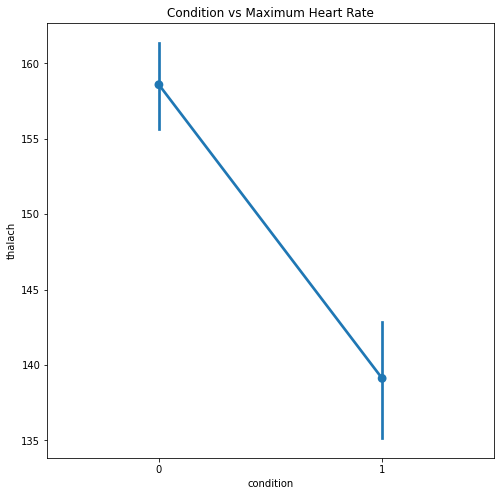

In [89]:
# 심장병 vs 최대심박수
plt.figure(figsize=(8,8))
plt.title("Condition vs Maximum Heart Rate")
sns.pointplot(data=datasets, x='condition', y='thalach')
plt.show()


추론 : 최대심박수의 크기가 낮은 사람이 심장병에 걸리는 경향이 있다

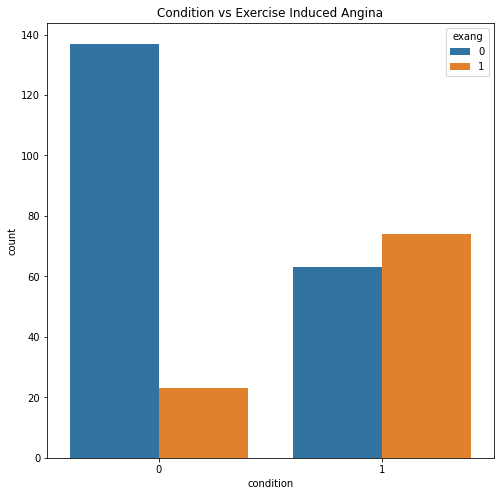

In [90]:
# 심장병 vs 운동에 의한 협심증
plt.figure(figsize=(8,8))
plt.title("Condition vs Exercise Induced Angina")
sns.countplot(data=datasets, x='condition', hue='exang')
plt.show()

운동에 의한 협심증이 있는 사람이 심장병에 걸리는 경향이 크다.

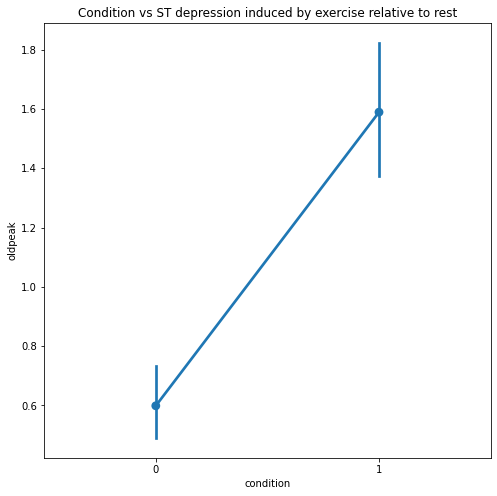

In [91]:
# 심장병 vs 휴식에 비해 운동으로 유발된 ST 저하
plt.figure(figsize=(8,8))
plt.title("Condition vs ST depression induced by exercise relative to rest")
sns.pointplot(data=datasets, x='condition', y='oldpeak')
plt.show()

ST분절은 관상동맥질환 환자에서는 상승, 하강으로만 측정된다
ST분절 저하(하강,하락 등)은 심장질환에서 일어난다.
oldpeak의 크기가 클수록(ST분절의 하강이 큼) 심장병에 걸리는 경향이 높다

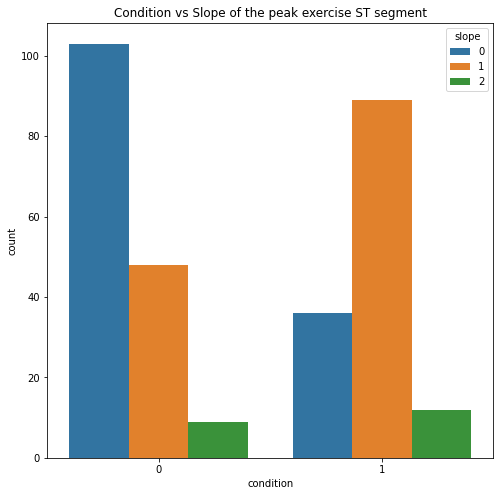

In [92]:
# 심장병 vs slope of the peak exercise ST segment (ST분절의 기울기)
plt.figure(figsize=(8,8))
plt.title("Condition vs Slope of the peak exercise ST segment")
sns.countplot(data=datasets, x='condition', hue='slope')
plt.show()

평평하거나, 기울기가 내리막이거나, 밑으로 내려간 ST분절은 심근 허혈을 의미할 수 있다.
 추론 : 평평한 slope값을 가지는 환자가 심장병에 걸리는 경향이 있다.

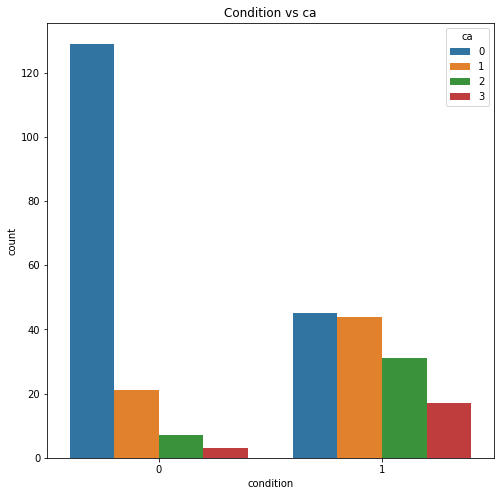

In [93]:
# 심장병 vs ca(플로로소피로 투시된 혈관의 수 )
plt.figure(figsize=(8,8))
plt.title("Condition vs ca")
sns.countplot(data=datasets, x='condition', hue='ca')
plt.show()

추론 : 모든영역에서 심장병에 걸릴 영향이 조금씩은 있다.

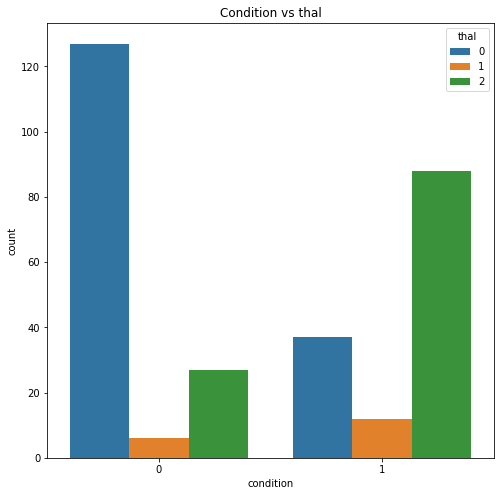

In [94]:
# 심장병 vs thal(결함 )
plt.figure(figsize=(8,8))
plt.title("Condition vs thal")
sns.countplot(data=datasets, x='condition', hue='thal')
plt.show()

## 특성과의 상관 관계

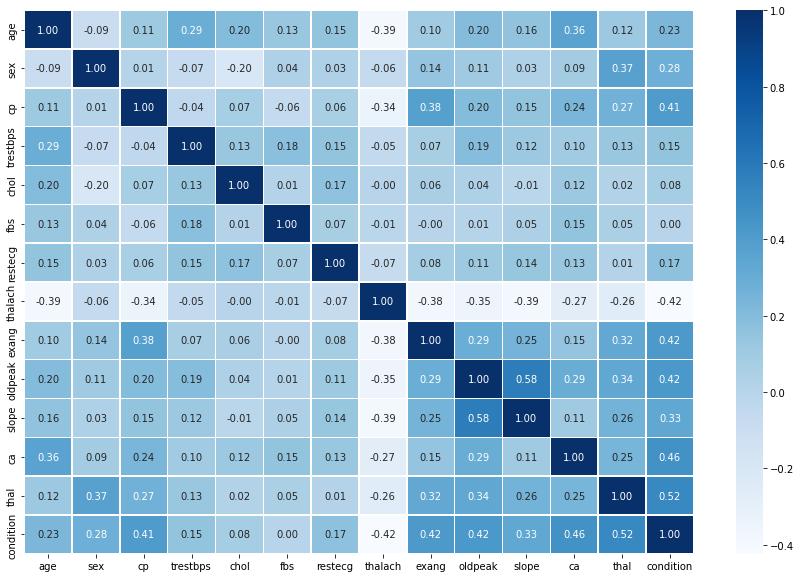

In [95]:
plt.figure(figsize = (15,10))
sns.heatmap(data = datasets.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues');

## 데이터 분리

In [96]:
#데이터세트에서 X와 y로 target나누기
X = datasets.iloc[:,0:13]
y = datasets.iloc[:,13]

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [98]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
168,66,1,3,112,212,0,2,132,1,0.1,0,1,0
108,54,1,2,120,258,0,2,147,0,0.4,1,0,2
94,60,0,2,102,318,0,0,160,0,0.0,0,1,0
139,44,1,2,130,233,0,0,179,1,0.4,0,0,0
81,67,0,2,152,277,0,0,172,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,59,1,3,140,177,0,0,162,1,0.0,0,1,2
67,41,0,1,126,306,0,0,163,0,0.0,0,0,0
25,70,1,1,156,245,0,2,143,0,0.0,0,0,0
196,61,1,3,140,207,0,2,138,1,1.9,0,1,2


In [99]:
print('심장병 학습 데이터 개수', len(x_train))
print('심장병 테스트 데이터 개수', len(x_test))
print('전체 훈련 개수', len(x_train+x_test))

심장병 학습 데이터 개수 237
심장병 테스트 데이터 개수 60
전체 훈련 개수 297


## 모델링

In [100]:
#모델 학습
model = XGBClassifier(max_depth=4)
model.fit(x_train, y_train)

#예측하기
y_pred = model.predict(x_test)
prediction = [round(value) for value in y_pred]

#평가하기
accuracy = accuracy_score(y_test, prediction)
print('Accuracy : %.2f%%' % (accuracy*100))

Accuracy : 85.00%


In [101]:
#학습된 모델로 특정 환자에 대해 심장병을 진단

value = pd.DataFrame([[69,1,0,160,234,1,2,131,0,0.1,1,1,0]], columns=x_train.columns.tolist())
l = model.predict_proba(value)
print('No Heart disease: {:.2%}\n Yes haert disease: {:.2%}'.format(l[0][0], l[0][1]))

# A 환자에 대해 심장병이 아니라고 할 확률 84.37%, 심장병이라고 할 확률 15.63%
# A 환자는 심장병이 아님.

No Heart disease: 89.23%
 Yes haert disease: 10.77%


### 의사결정트리 

In [102]:
rcParams['figure.figsize'] = 100,200

#의사 결정 트리 시각화
plot_tree(model)
plt.show()

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [ ]:
!pip install graphviz

leaf의 값이 음수(-)면 심장병이 없음 0이면 중립, 양수(+)면 심장병이 있음을 나타낸다.

### 피처 중요도(feature importance)
- 피처의 모델의 에러를 얼마나 줄여주는지를 근거로 중요성을 측정하는 방법
- 피처중요도는 피처 간 의존성이 낮은 상태에서 효율이 높다


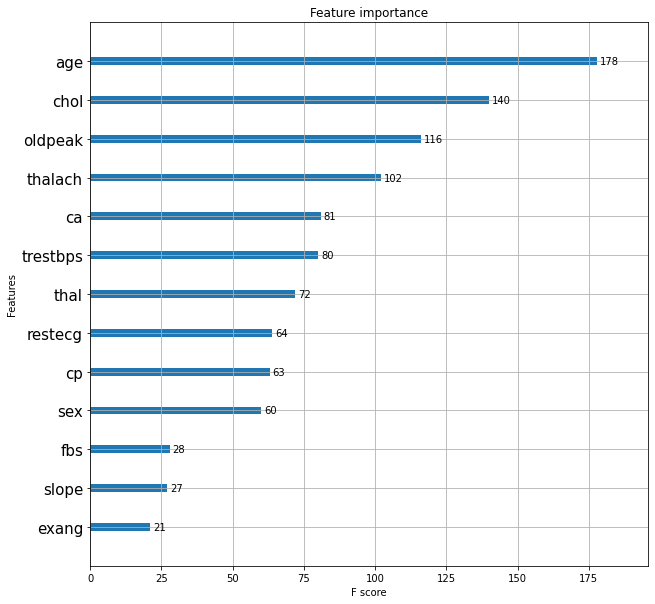

In [103]:
rcParams['figure.figsize']= 10,10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

 - 학습된 모델은 심장병 예측에 age(나이), chol(콜레스테롤), oldpeak(운동으로 유발된 ST분절 하강), thalach(최대심박수)
 
 - 의사결정트리는 노드의 선정과 분기 기준이 정보 이득이 큰 방향, 피처 중요도는 모델의 분류 에러가 큰 순서로 정렬


In [104]:
#JS 시각화 라이브러리 로드하기
shap.initjs()

In [105]:
#SHAP 값으로 모델의 예측을 설명하기
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

In [106]:
#첫 번째 데이터에 대한 구체적 SHAP 값 시각화
shap.force_plot(explainer.expected_value, 
               shap_values[0,:],
                x_train.iloc[0,:]
               )

In [107]:
shap.force_plot(explainer.expected_value,
               shap_values[236,:],
               x_train.iloc[236,:])


- 특정 데이터 해석:
예측 값에 긍정적 요인은 빨간색, 부정적 요인은 파란색으로 표현합니다. 
Bar의 크기가 큰 것이 큰 영향을 준 요인입니다.

In [108]:
#전체 데이터에 Shapley value를 누적하여 시각화
shap.force_plot(explainer.expected_value, shap_values, x_train)

- 전체 데이터 해석:
전체 데이터 해석 시에는 각 열에 대한 Shapley Value를 누적하여 시각화 합니다.
특정 데이터 Force plot을 90도 회전해서 쌓는다고 생각하시면 됩니다.

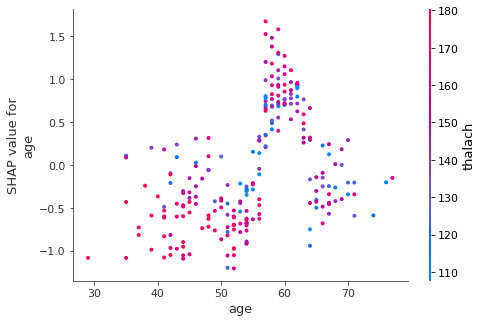

In [109]:
shap.dependence_plot("age", shap_values, x_train)

*수정 필요* //해당 plot은 특정 Feature(age)에 대한 Shapley Value를 시각화 합니다. x축은 각 Feature(age)의 값이, y축 값은 Shapley value 값입니다.
오른쪽 y축에 나온 특성은 현재 그린 특성과의 관계(상호작용 효과)를 나타//

C:\Users\ted33\anaconda3\envs\heart1\lib\site-packages\shap\plots\dependence.py:195: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  norm=color_norm, rasterized=len(xv) > 500


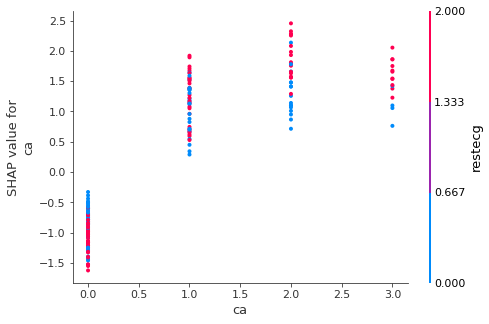

C:\Users\ted33\anaconda3\envs\heart1\lib\site-packages\shap\plots\dependence.py:195: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  norm=color_norm, rasterized=len(xv) > 500


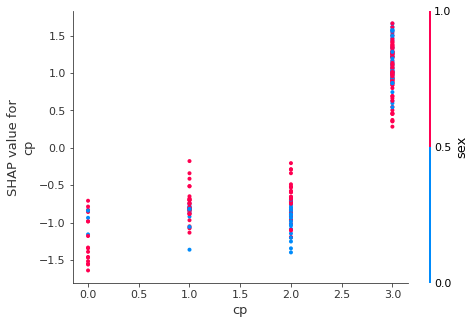

In [110]:
#x축이 각 데이터 관측치
#빨간색은 예측에 긍정적인 영향
#파란색은 예측에 부정적인 영향
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

#dependence_plot 을 통해 각 특성의 Shapely value를 확인
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, x_train)

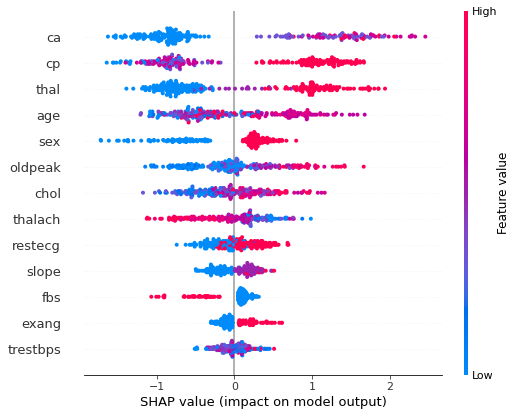

In [111]:
#전체 특성들이 Shapley value 분포에 어떤 영향을 미치는지 시각화
#y축은 각 특성
#x축은 Shapely value
#색깔은 특성값을 나타내어 빨간색으로 갈수록 높은 값
#특성은 예측에 미치는 영향력(=중요도)에 따라 정렬
#ca가 결과값 예측에 가장 큰 영향
# ca 특성값이 작을수록(파란색) 예측에 긍정적인 영향, 클수록(빨간색) 부정적인 영향
shap.summary_plot(shap_values, x_train)

- 하나의 관측치 마다의 전체 변수의 중요도 값을 나타냅니다.
y축은 각 특성을, x축은 Shapley Value를 나타내고 있습니다. 색깔은 특성값을 나타내어
빨간색으로 갈수록 높은 값을 의미합니다. 

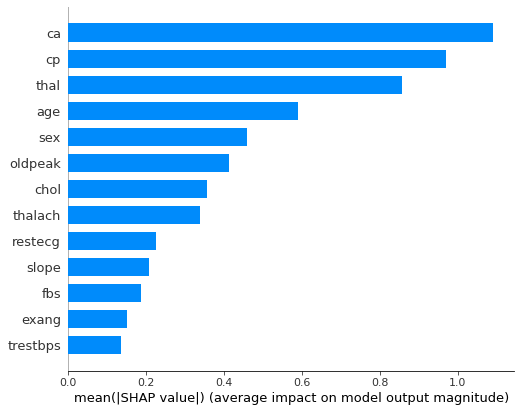

In [112]:
#파라미터로 plot_type을 정해주면 각 특성이 모델에 미치는 절대 영향도(=기여분)를 눈으로 파악
shap.summary_plot(shap_values, x_train, plot_type='bar')

- 전제 관측치에 대해서 전체 변수의 전반적인 중요도 값을 Bar(막대)형태로 나타냅니다.
앞서 위에서 말한 그래프 상에서 특성은 예측에 미치는
영향력(=중요도)에 따라 정렬됩니다. 즉 ca가 결과값 예측에 가장 큰 영향을 끼치는 것입니다.

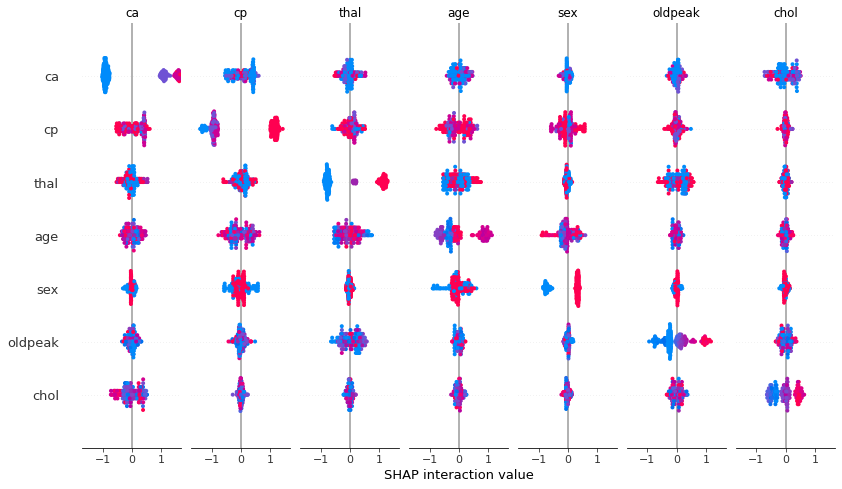

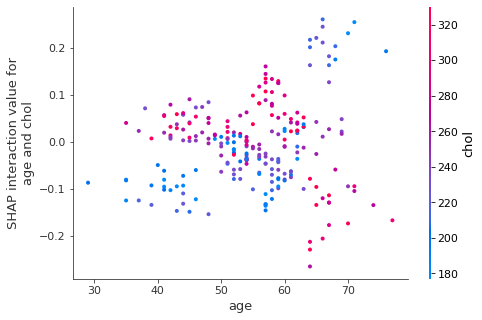

In [113]:
#각 특성 간의 관계(=상호작용 효과)를 파악

shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(x_train)

shap.summary_plot(shap_interaction_values, x_train)
shap.dependence_plot(
    ("age", "chol"),
    shap_interaction_values, x_train,
    display_features=x_train)

- interaction plot:
명칭에서 알 수 있듯이, 각 특성 간의 관계(=상호작용 효과)를 파악할 수 있습니다. 한 특성이 모델에 미치는 영향도에는 각 특성 간의 관계도 포함될 수 있어 이를 따로 분리함으로써 추가적인 인사이트를 발견할 수 있습니다.

In [114]:
x_train.iloc[0,:]

age          66.0
sex           1.0
cp            3.0
trestbps    112.0
chol        212.0
fbs           0.0
restecg       2.0
thalach     132.0
exang         1.0
oldpeak       0.1
slope         0.0
ca            1.0
thal          0.0
Name: 168, dtype: float64

Text(0, 0.5, 'condition')

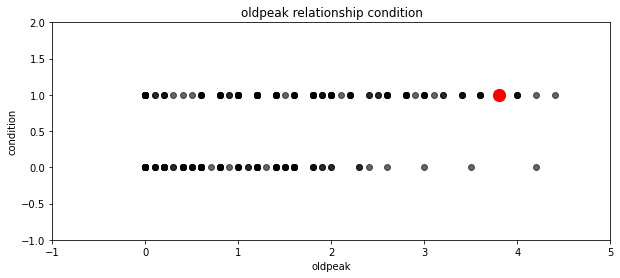

In [115]:
fig, ax1 = plt.subplots(1,1, figsize=(10,4))
idx = 168
ax1.scatter(X['oldpeak'], y, color='black', alpha=0.6)
ax1.scatter(x_train['oldpeak'].iloc[idx], y_train[idx], c='red', s=150)
ax1.set_title('oldpeak relationship condition')
ax1.set_xlim(-1,5)
ax1.set_xlabel('oldpeak')
ax1.set_ylim(-1,2)
ax1.set_ylabel('condition')

In [116]:
import tensorflow as tf


datasets.hist(bins=50, figsize=(20,15))
plt.show()

ModuleNotFoundError: No module named 'tensorflow'